In [1]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import numpy as np # linear regression (statsmodels)
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = "./__datasets/Door_to_Door_AmazonSouq.com_Survey_Results_RM.csv"


# reading the file into Python
survey = pd.read_csv(file)


# checking the file
survey.head(n = 5)

,Interview_ID,Interview_Survey Date,site_used,Product_Quality,Service_Quality,Price_Quality_Relation_Value,How_satisfied_are_you_with_this_ecommerce_company,Keep_Buying,Recommend,Did_recommend,Rate_products,Rate_variety,Navigate_Ease,Find_Product_Ease,Rate_availability,Rate_promotions,Rate_information,Ease_Compare,Ease_Manage_Cart,Checkout_rate,Security,Deilvery_understanding,Deilvery_ops_satisfaction,Track_rate,time_deliver,Product_quality2,Satisfied_customer_service,Return_Exchange_Satisfied,payment,mobile_app,Website_pc,Website_mobile,method_payment,credit_card,paypal,nbd,cash,other,Read_reviews,Interact_with_seller,lastsix_months_no_times_purchased,Average_amount_spent_per_visit_last_3_months,Spent_under_1000_AED,Spent_over_1000_AED,1physicalstoore_2onlinestore_3both,Age,age18_25,age26_35,age36_45,age46_55,age56_Up,Marital Status,Married,Single,gender,male,female,Highest level of Education,No_school,K12,High_School_Completed,Technical,College,Post_Graduate,number_dependents,Employement_Status,Monthly_Income 1_5500 2_8000 3_11000 4_15000 5_20000 6_27000 7_35000 8_5000 9_51000 98_0,Monthly_Income_1_5500_AED,Monthly_Income_2_8000_AED,Monthly_Income_3_11000_AED,Monthly_Income_4_15000_AED,Monthly_Income_5_20000_AED,Monthly_Income_6_27000_AED,Monthly_Income_7_35000_AED,Monthly_Income_8_5000_AED,Monthly_Income_9_51000_PLUS,Monthly_Income_98_noanswer,Monthly_Household_Income,hh_income_1,hh_income_2,hh_income_3,hh_income_4,hh_income_5,hh_income_6,hh_income_7,hh_income_8,hh_income9,hh_income_noanswer
0,3,9/30/17,ZALORA,8,8,9,8,6,7,No,8,8,7,8,8,8,8,9,7,9,7,10,8,9,7,8,8,7,2,0,1,0,1,1,0,0,0,0,Yes,No,1,1022.93,0,1,3,48,0,0,0,1,0,Married,1,0,Male,0,0,K12 completed,0,1,0,0,0,0,2,1,3,0,0,1,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0
1,9,6/2/18,Splash,6,7,7,8,7,8,No,8,8,7,7,7,8,7,6,8,8,9,8,8,9,6,9,8,0,2,0,1,0,5,0,0,0,1,0,Yes,No,4,137.11,1,0,3,42,0,0,1,0,0,Married,1,0,Male,1,0,University/College Degree,0,0,0,0,1,0,2,1,5,0,0,0,0,1,0,0,0,0,0,7,0,0,0,0,0,0,1,0,0,0
2,13,9/23/17,Competitor 4,6,7,7,8,8,7,No,6,8,6,7,8,9,7,8,8,9,9,7,7,7,9,8,8,7,1,1,0,0,2,0,1,0,0,0,Yes,Yes,7,74.28,1,0,3,18,1,0,0,0,0,Single,0,1,Male,1,0,K12 completed,0,1,0,0,0,0,0,5,,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0
3,17,8/23/17,Competitor 4,7,7,7,7,7,7,No,8,6,7,7,6,8,7,8,7,7,6,8,6,7,7,6,7,7,2,0,1,0,2,0,1,0,0,0,Yes,Yes,1,560.32,1,0,2,43,0,0,1,0,0,Married,1,0,Female,0,1,University/College Degree,0,0,0,0,1,0,4,1,98,0,0,0,0,0,0,0,0,0,1,98,0,0,0,0,0,0,0,0,0,1
4,18,1/29/18,Competitor 4,7,6,8,8,6,6,No,7,7,9,8,7,7,8,8,8,7,8,7,8,8,8,7,8,8,2,0,1,0,2,0,1,0,0,0,Yes,No,4,252.74,1,0,3,34,0,1,0,0,0,Married,1,0,Male,1,0,University/College Degree,0,0,0,0,1,0,3,1,4,0,0,0,1,0,0,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0


In [3]:
survey.describe()

,Interview_ID,Product_Quality,Service_Quality,Price_Quality_Relation_Value,How_satisfied_are_you_with_this_ecommerce_company,Keep_Buying,Recommend,Rate_products,Rate_variety,Navigate_Ease,Find_Product_Ease,Rate_availability,Rate_promotions,Rate_information,Ease_Compare,Ease_Manage_Cart,Checkout_rate,Security,Deilvery_understanding,Deilvery_ops_satisfaction,Track_rate,time_deliver,Product_quality2,Satisfied_customer_service,Return_Exchange_Satisfied,payment,mobile_app,Website_pc,Website_mobile,method_payment,credit_card,paypal,nbd,cash,other,lastsix_months_no_times_purchased,Average_amount_spent_per_visit_last_3_months,Spent_under_1000_AED,Spent_over_1000_AED,1physicalstoore_2onlinestore_3both,Age,age18_25,age26_35,age36_45,age46_55,age56_Up,Married,Single,male,female,No_school,K12,High_School_Completed,Technical,College,Post_Graduate,number_dependents,Employement_Status,Monthly_Income_1_5500_AED,Monthly_Income_2_8000_AED,Monthly_Income_3_11000_AED,Monthly_Income_4_15000_AED,Monthly_Income_5_20000_AED,Monthly_Income_6_27000_AED,Monthly_Income_7_35000_AED,Monthly_Income_8_5000_AED,Monthly_Income_9_51000_PLUS,Monthly_Income_98_noanswer,Monthly_Household_Income,hh_income_1,hh_income_2,hh_income_3,hh_income_4,hh_income_5,hh_income_6,hh_income_7,hh_income_8,hh_income9,hh_income_noanswer
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,2946.575000,7.573750,7.548750,7.573125,7.575625,7.44625,7.290625,7.858125,7.596250,7.631875,7.742500,7.711250,7.760625,7.590000,7.682500,7.641875,7.698125,7.831875,7.579375,7.356875,6.096875,7.728125,7.850000,7.476250,6.084375,1.631250,0.460625,0.447500,0.091875,2.435000,0.539375,0.154375,0.045000,0.115625,0.145625,2.246875,456.242138,0.905625,0.093750,2.232500,35.349375,0.100625,0.460625,0.293750,0.128125,0.016875,0.631250,0.366875,0.540625,0.458750,0.001250,0.046875,0.129375,0.330625,0.413750,0.078125,1.69125,1.368750,0.029375,0.193125,0.200625,0.230625,0.111875,0.050000,0.024375,0.006875,0.003125,0.027500,13.894375,0.000625,0.014375,0.061250,0.123750,0.226250,0.178125,0.155000,0.105625,0.046250,0.031250
std,1717.270229,1.362248,1.314802,1.363200,1.192233,1.27451,1.357779,1.046987,1.267573,1.199900,1.179327,1.153779,1.361335,1.285178,1.330526,1.159509,1.141407,1.185110,1.284905,1.831765,3.186116,1.257059,1.282489,1.520158,3.064413,0.645588,0.498603,0.497392,0.288940,1.941167,0.498603,0.361421,0.207369,0.319875,0.352840,1.632511,508.524101,0.292441,0.291572,0.792203,8.463796,0.300926,0.498603,0.455621,0.334333,0.128843,0.482617,0.482103,0.498503,0.498451,0.035344,0.211437,0.335719,0.470585,0.492659,0.268452,1.50036,1.002947,0.168908,0.394874,0.400593,0.421365,0.315311,0.218013,0.154259,0.082656,0.055832,0.163586,26.101226,0.025000,0.119068,0.239863,0.329399,0.418534,0.382738,0.362018,0.307453,0.210092,0.174047
min,3.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0000

In [4]:
survey.shape

(1600, 88)

In [5]:
for column in survey:
    print(column)

Interview_ID
Interview_Survey Date
site_used
Product_Quality
Service_Quality
Price_Quality_Relation_Value
How_satisfied_are_you_with_this_ecommerce_company
Keep_Buying
Recommend
Did_recommend
Rate_products
Rate_variety
Navigate_Ease
Find_Product_Ease
Rate_availability
Rate_promotions
Rate_information
Ease_Compare
Ease_Manage_Cart
Checkout_rate
Security
Deilvery_understanding
Deilvery_ops_satisfaction
Track_rate
time_deliver
Product_quality2
Satisfied_customer_service
Return_Exchange_Satisfied
payment
mobile_app
Website_pc
Website_mobile
method_payment
credit_card
paypal
nbd
cash
other
Read_reviews
Interact_with_seller
lastsix_months_no_times_purchased
Average_amount_spent_per_visit_last_3_months
Spent_under_1000_AED
Spent_over_1000_AED
1physicalstoore_2onlinestore_3both
Age
age18_25
age26_35
age36_45
age46_55
age56_Up
Marital Status
Married
Single
gender
male
female
Highest level of Education
No_school
K12
High_School_Completed
Technical
College
Post_Graduate
number_dependents
Employem

In [6]:
# displaying the LAST 5 rows of the DataFrame
survey.tail(n = 5)

,Interview_ID,Interview_Survey Date,site_used,Product_Quality,Service_Quality,Price_Quality_Relation_Value,How_satisfied_are_you_with_this_ecommerce_company,Keep_Buying,Recommend,Did_recommend,Rate_products,Rate_variety,Navigate_Ease,Find_Product_Ease,Rate_availability,Rate_promotions,Rate_information,Ease_Compare,Ease_Manage_Cart,Checkout_rate,Security,Deilvery_understanding,Deilvery_ops_satisfaction,Track_rate,time_deliver,Product_quality2,Satisfied_customer_service,Return_Exchange_Satisfied,payment,mobile_app,Website_pc,Website_mobile,method_payment,credit_card,paypal,nbd,cash,other,Read_reviews,Interact_with_seller,lastsix_months_no_times_purchased,Average_amount_spent_per_visit_last_3_months,Spent_under_1000_AED,Spent_over_1000_AED,1physicalstoore_2onlinestore_3both,Age,age18_25,age26_35,age36_45,age46_55,age56_Up,Marital Status,Married,Single,gender,male,female,Highest level of Education,No_school,K12,High_School_Completed,Technical,College,Post_Graduate,number_dependents,Employement_Status,Monthly_Income 1_5500 2_8000 3_11000 4_15000 5_20000 6_27000 7_35000 8_5000 9_51000 98_0,Monthly_Income_1_5500_AED,Monthly_Income_2_8000_AED,Monthly_Income_3_11000_AED,Monthly_Income_4_15000_AED,Monthly_Income_5_20000_AED,Monthly_Income_6_27000_AED,Monthly_Income_7_35000_AED,Monthly_Income_8_5000_AED,Monthly_Income_9_51000_PLUS,Monthly_Income_98_noanswer,Monthly_Household_Income,hh_income_1,hh_income_2,hh_income_3,hh_income_4,hh_income_5,hh_income_6,hh_income_7,hh_income_8,hh_income9,hh_income_noanswer
1595,6064,10/11/17,Competitor 3,8,7,8,8,9,8,Yes,8,9,10,9,8,8,9,10,9,8,9,8,9,9,9,9,8,0,1,1,0,0,2,0,1,0,0,0,Yes,Yes,1,646.25,1,0,3,32,0,1,0,0,0,Single,0,1,Female,0,1,Technical Diploma/Partially completed College,0,0,0,1,0,0,0,1,3,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0
1596,6066,1/31/18,EZBUY,6,7,6,7,8,7,No,8,9,9,10,8,6,6,7,7,10,8,10,9,6,9,7,9,0,3,0,0,1,6,0,0,0,0,1,No,No,2,708.78,1,0,3,26,0,1,0,0,0,Single,0,1,Male,1,0,Technical Diploma/Partially completed College,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0
1597,6068,10/14/17,DG Sharaf,9,8,8,8,7,8,Yes,8,8,8,7,6,9,9,7,6,6,8,8,9,7,8,6,8,8,2,0,1,0,2,0,1,0,0,0,Yes,No,4,132.61,1,0,2,20,1,0,0,0,0,Single,0,1,Male,1,0,High School Completed,0,0,1,0,0,0,0,5,,0,0,0,0,0,0,0,0,0,0,4,0,0,0,1,0,0,0,0,0,0
1598,6077,10/11/17,AMAZON/souq.com,7,7,10,8,9,7,Yes,8,7,7,7,7,8,8,6,9,7,7,8,9,0,10,10,9,8,1,1,0,0,1,1,0,0,0,0,Yes,Yes,1,731.40,1,0,3,32,0,1,0,0,0,Married,1,0,Female,0,1,University/College Degree,0,0,0,0,1,0,4,1,5,0,0,0,0,1,0,0,0,0,0,6,0,0,0,0,0,1,0,0,0,0
1599,6085,5/3/18,Competitor 3,8,8,10,8,8,7,No,8,8,7,7,8,8,8,9,8,7,7,8,8,8,8,8,8,8,1,1,0,0,2,0,1,0,0,0,No,Yes,3,197.74,1,0,2,48,0,0,0,1,0,Married,1,0,Male,1,0,K12 completed,0,1,0,0,0,0,4,1,1,1,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0


In [7]:
# INFOrmation about each variable
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 88 columns):
 #   Column                                                                                    Non-Null Count  Dtype  
---  ------                                                                                    --------------  -----  
 0   Interview_ID                                                                              1600 non-null   int64  
 1   Interview_Survey Date                                                                     1600 non-null   object 
 2   site_used                                                                                 1600 non-null   object 
 3   Product_Quality                                                                           1600 non-null   int64  
 4   Service_Quality                                                                           1600 non-null   int64  
 5   Price_Quality_Relation_Value                           

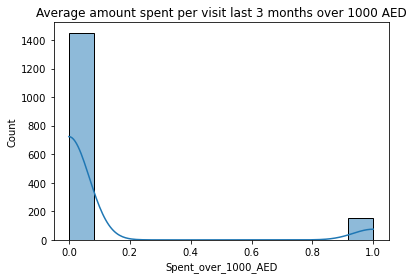

In [12]:


# developing a histogram using HISTPLOT
sns.histplot(data   = survey,
             x      = 'Spent_over_1000_AED',
             kde    = True)


# title and axis labels
plt.title(label   = "Average amount spent per visit last 3 months over 1000 AED")
plt.xlabel(xlabel = "Spent_over_1000_AED") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [9]:
for column in survey:
    print("'" +column+ "'", end = ',')

'Interview_ID','Interview_Survey Date','site_used','Product_Quality','Service_Quality','Price_Quality_Relation_Value','How_satisfied_are_you_with_this_ecommerce_company','Keep_Buying','Recommend','Did_recommend','Rate_products','Rate_variety','Navigate_Ease','Find_Product_Ease','Rate_availability','Rate_promotions','Rate_information','Ease_Compare','Ease_Manage_Cart','Checkout_rate','Security','Deilvery_understanding','Deilvery_ops_satisfaction','Track_rate','time_deliver','Product_quality2','Satisfied_customer_service','Return_Exchange_Satisfied','payment','mobile_app','Website_pc','Website_mobile','method_payment','credit_card','paypal','nbd','cash','other','Read_reviews','Interact_with_seller','lastsix_months_no_times_purchased','Average_amount_spent_per_visit_last_3_months','Spent_under_1000_AED','Spent_over_1000_AED','1physicalstoore_2onlinestore_3both','Age','age18_25','age26_35','age36_45','age46_55','age56_Up','Marital Status','Married','Single','gender','male','female','Highes

Y-Variable
'Average_amount_spent_per_visit_last_3_months'

X-Variable
'How satisfied are you with this e-commerce company'

In [13]:
# building a base model

# INSTANTIATING a model type
lm_practice = smf.ols(formula = """ Spent_over_1000_AED ~ How_satisfied_are_you_with_this_ecommerce_company """,
                        data = survey)


# telling Python to FIT the data to the blueprint
results = lm_practice.fit()


# printing a summary of the results
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Spent_over_1000_AED   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     5.200
Date:                 Wed, 24 Nov 2021   Prob (F-statistic):             0.0227
Time:                         07:17:36   Log-Likelihood:                -295.25
No. Observations:                 1600   AIC:                             594.5
Df Residuals:                     1598   BIC:                             605.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [15]:
# creating a list of continuous features (including Sale_Price)
continuous_data = ['Interview_ID','Interview_Survey Date','site_used','Product_Quality','Service_Quality','Price_Quality_Relation_Value','How_satisfied_are_you_with_this_ecommerce_company','Keep_Buying','Recommend','Did_recommend','Rate_products','Rate_variety','Navigate_Ease','Find_Product_Ease','Rate_availability','Rate_promotions','Rate_information','Ease_Compare','Ease_Manage_Cart','Checkout_rate','Security','Deilvery_understanding','Deilvery_ops_satisfaction','Track_rate','time_deliver','Product_quality2','Satisfied_customer_service','Return_Exchange_Satisfied','payment','mobile_app','Website_pc','Website_mobile','method_payment','credit_card','paypal','nbd','cash','other','Read_reviews','Interact_with_seller','lastsix_months_no_times_purchased','Average_amount_spent_per_visit_last_3_months','Spent_under_1000_AED','Spent_over_1000_AED','1physicalstoore_2onlinestore_3both','Age','age18_25','age26_35','age36_45','age46_55','age56_Up','Marital Status','Married','Single','gender','male','female','Highest level of Education','No_school','K12','High_School_Completed','Technical','College','Post_Graduate','number_dependents','Employement_Status','Monthly_Income 1_5500 2_8000 3_11000 4_15000 5_20000 6_27000 7_35000 8_5000 9_51000 98_0','Monthly_Income_1_5500_AED','Monthly_Income_2_8000_AED','Monthly_Income_3_11000_AED','Monthly_Income_4_15000_AED','Monthly_Income_5_20000_AED','Monthly_Income_6_27000_AED','Monthly_Income_7_35000_AED','Monthly_Income_8_5000_AED','Monthly_Income_9_51000_PLUS','Monthly_Income_98_noanswer','Monthly_Household_Income','hh_income_1','hh_income_2','hh_income_3','hh_income_4','hh_income_5','hh_income_6','hh_income_7','hh_income_8','hh_income9','hh_income_noanswer']

# developing a correlation matrix based on continuous features
survey_corr = survey[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price
survey_corr.loc[ : , 'Spent_over_1000_AED'].round(decimals = 2).sort_values(ascending = False)

Spent_over_1000_AED                                  1.00
Average_amount_spent_per_visit_last_3_months         0.75
Age                                                  0.12
age56_Up                                             0.12
Satisfied_customer_service                           0.09
Married                                              0.09
payment                                              0.08
hh_income_8                                          0.08
hh_income9                                           0.07
Recommend                                            0.07
Product_Quality                                      0.07
Ease_Compare                                         0.07
Rate_availability                                    0.07
Monthly_Income_9_51000_PLUS                          0.06
Navigate_Ease                                        0.06
number_dependents                                    0.06
cash                                                 0.06
Deilvery_ops_s

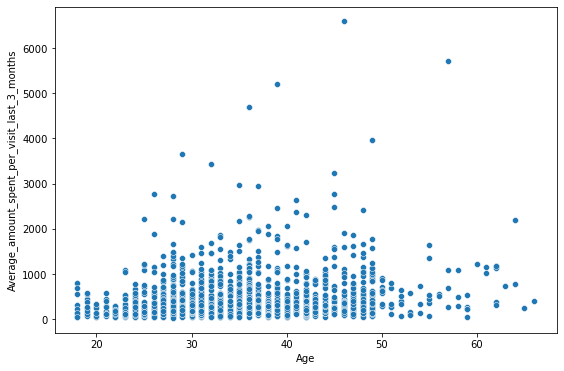

In [19]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = 'Age',
           y    = 'Average_amount_spent_per_visit_last_3_months',
           data = survey)


# SHOWing the results
plt.show()

In [20]:
# importing an additional package
import statsmodels.formula.api as smf # predictive modeling with nice outputs

In [21]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """Spent_over_1000_AED ~ Age""",
                  data = survey)


# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Spent_over_1000_AED   R-squared:                       0.015
Model:                             OLS   Adj. R-squared:                  0.015
Method:                  Least Squares   F-statistic:                     24.98
Date:                 Wed, 24 Nov 2021   Prob (F-statistic):           6.42e-07
Time:                         07:21:29   Log-Likelihood:                -285.44
No. Observations:                 1600   AIC:                             574.9
Df Residuals:                     1598   BIC:                             585.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0573      0.031     -1.84

In [52]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """ Spent_over_1000_AED ~ Product_Quality + Service_Quality + Price_Quality_Relation_Value + How_satisfied_are_you_with_this_ecommerce_company + Keep_Buying + Recommend + Did_recommend + Rate_products + Rate_variety + Navigate_Ease + Find_Product_Ease + Rate_availability + Rate_promotions + Rate_information + Ease_Compare + Ease_Manage_Cart + Checkout_rate + Security + Deilvery_understanding + Deilvery_ops_satisfaction + Track_rate + time_deliver + Product_quality2 + Satisfied_customer_service + Return_Exchange_Satisfied + payment + mobile_app + Website_pc + Website_mobile + method_payment + credit_card + paypal + nbd + cash + other + Read_reviews + Interact_with_seller + lastsix_months_no_times_purchased + Average_amount_spent_per_visit_last_3_months + Spent_under_1000_AED + Spent_over_1000_AED + Age + age18_25 + age26_35 + age36_45 + age46_55 + age56_Up + Married + Single + gender + male + female + No_school + K12 + High_School_Completed + Technical + College + Post_Graduate + number_dependents + Employement_Status + Monthly_Income_1_5500_AED + Monthly_Income_2_8000_AED + Monthly_Income_3_11000_AED + Monthly_Income_4_15000_AED + Monthly_Income_5_20000_AED + Monthly_Income_6_27000_AED + Monthly_Income_7_35000_AED + Monthly_Income_8_5000_AED + Monthly_Income_9_51000_PLUS + Monthly_Income_98_noanswer + Monthly_Household_Income + hh_income_1 + hh_income_2 + hh_income_3 + hh_income_4 + hh_income_5 + hh_income_6 + hh_income_7 + hh_income_8 + hh_income9 + hh_income_noanswer""", data = survey)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())


                             OLS Regression Results                            
Dep. Variable:     Spent_over_1000_AED   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 2.116e+27
Date:                 Wed, 24 Nov 2021   Prob (F-statistic):               0.00
Time:                         07:52:38   Log-Likelihood:                 47606.
No. Observations:                 1600   AIC:                        -9.506e+04
Df Residuals:                     1526   BIC:                        -9.467e+04
Df Model:                           73                                         
Covariance Type:             nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [53]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """ Spent_over_1000_AED ~ Did_recommend + Rate_products + Rate_variety + Find_Product_Ease + Rate_availability + Satisfied_customer_service + + age36_45 + age46_55 + age56_Up""", data = survey)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Spent_over_1000_AED   R-squared:                       0.037
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     6.728
Date:                 Wed, 24 Nov 2021   Prob (F-statistic):           1.63e-09
Time:                         08:04:31   Log-Likelihood:                -267.95
No. Observations:                 1600   AIC:                             555.9
Df Residuals:                     1590   BIC:                             609.7
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept 

In [ ]:
'Interview_ID','Interview_Survey Date','site_used','Product_Quality','Service_Quality','Price_Quality_Relation_Value','How_satisfied_are_you_with_this_ecommerce_company','Keep_Buying','Recommend','Did_recommend','Rate_products','Rate_variety','Navigate_Ease','Find_Product_Ease','Rate_availability','Rate_promotions','Rate_information','Ease_Compare','Ease_Manage_Cart','Checkout_rate','Security','Deilvery_understanding','Deilvery_ops_satisfaction','Track_rate','time_deliver','Product_quality2','Satisfied_customer_service','Return_Exchange_Satisfied','payment','mobile_app','Website_pc','Website_mobile','method_payment','credit_card','paypal','nbd','cash','other','Read_reviews','Interact_with_seller','lastsix_months_no_times_purchased','Average_amount_spent_per_visit_last_3_months','Spent_under_1000_AED','Spent_over_1000_AED','1physicalstoore_2onlinestore_3both','Age','age18_25','age26_35','age36_45','age46_55','age56_Up','Marital Status','Married','Single','gender','male','female','Highest level of Education','No_school','K12','High_School_Completed','Technical','College','Post_Graduate','number_dependents','Employement_Status','Monthly_Income 1_5500 2_8000 3_11000 4_15000 5_20000 6_27000 7_35000 8_5000 9_51000 98_0','Monthly_Income_1_5500_AED','Monthly_Income_2_8000_AED','Monthly_Income_3_11000_AED','Monthly_Income_4_15000_AED','Monthly_Income_5_20000_AED','Monthly_Income_6_27000_AED','Monthly_Income_7_35000_AED','Monthly_Income_8_5000_AED','Monthly_Income_9_51000_PLUS','Monthly_Income_98_noanswer','Monthly_Household_Income','hh_income_1','hh_income_2','hh_income_3','hh_income_4','hh_income_5','hh_income_6','hh_income_7','hh_income_8','hh_income9','hh_income_noanswer']


In [24]:
# Step 1: INSTANTIATE a model object
lm_best = smf.ols(formula = """Spent_over_1000_AED ~ Age + hh_income_8 + age56_Up + Ease_Compare + Married + age46_55 + age36_45 + How_satisfied_are_you_with_this_ecommerce_company + number_dependents + Age + hh_income9 + Website_pc + Monthly_Income_6_27000_AED + Monthly_Income_5_20000_AED """, data = survey)

# Step 2: FIT the data into the model object
results = lm_best.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())


       




                             OLS Regression Results                            
Dep. Variable:     Spent_over_1000_AED   R-squared:                       0.038
Model:                             OLS   Adj. R-squared:                  0.030
Method:                  Least Squares   F-statistic:                     4.811
Date:                 Wed, 24 Nov 2021   Prob (F-statistic):           2.77e-08
Time:                         07:23:16   Log-Likelihood:                -266.91
No. Observations:                 1600   AIC:                             561.8
Df Residuals:                     1586   BIC:                             637.1
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [37]:




# log transforming Avg Price and saving it to the dataset
survey['log_Average_amount_spent_per_visit_last_3_months'] = np.log(survey['Average_amount_spent_per_visit_last_3_months'])




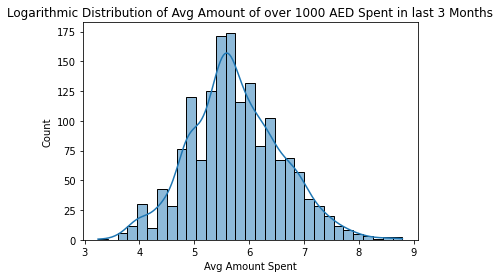

In [38]:
# developing a histogram using HISTPLOT
sns.histplot(data   = survey,
             x      = 'log_Average_amount_spent_per_visit_last_3_months',
             kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Avg Amount of over 1000 AED Spent in last 3 Months")
plt.xlabel(xlabel = "Avg Amount Spent") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [58]:
# log transforming Lot_Area and saving it to the dataset
survey['log_hh_income_8'] = np.log(survey['hh_income_8']+ 0.001)

survey['log_Age'] = np.log(survey['Age']+ 0.001)

survey['log_Website_pc'] = np.log(survey['Website_pc']+ 0.001)

survey['log_Monthly_Income_6_27000_AED'] = np.log(survey['Monthly_Income_6_27000_AED']+ 0.001)

survey['log_Monthly_Income_5_20000_AED'] = np.log(survey['Monthly_Income_5_20000_AED']+ 0.001)
       
survey['log_age56_Up'] = np.log(survey['age56_Up']+ 0.001)

survey['log_Ease_Compare'] = np.log(survey['Ease_Compare']+ 0.001)

survey['log_Married'] = np.log(survey['Married']+ 0.001)

survey['log_age46_55'] = np.log(survey['age46_55']+ 0.001)

survey['log_How_satisfied_are_you_with_this_ecommerce_company'] = np.log(survey['How_satisfied_are_you_with_this_ecommerce_company']+ 0.001)

survey['log_number_dependents'] = np.log(survey['number_dependents']+ 0.001)

survey['log_Spent_over_1000_AED'] = np.log(survey['Spent_over_1000_AED']+ 0.001)

survey['log_male'] = np.log(survey['male']+ 0.001)

survey['log_Rate_products'] = np.log(survey['Rate_products']+ 0.001)

survey['log_Rate_variety'] = np.log(survey['Rate_variety']+ 0.001)

survey['log_Find_Product_Ease'] = np.log(survey['Find_Product_Ease']+ 0.001)

survey['log_Rate_availability'] = np.log(survey['Rate_availability']+ 0.001)

survey['log_Satisfied_customer_service'] = np.log(survey['Satisfied_customer_service']+ 0.001)

survey['log_age36_45'] = np.log(survey['age36_45']+ 0.001)

survey['log_age46_55'] = np.log(survey['age46_55']+ 0.001)

survey['log_age56_Up'] = np.log(survey['age56_Up']+ 0.001)





In [60]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """ log_Spent_over_1000_AED ~ log_Rate_products + log_Rate_variety + log_Find_Product_Ease + log_Rate_availability + log_Satisfied_customer_service + log_age36_45 + log_age46_55 + log_age56_Up """, data = survey)

# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Spent_over_1000_AED   R-squared:                       0.032
Model:                                 OLS   Adj. R-squared:                  0.027
Method:                      Least Squares   F-statistic:                     6.579
Date:                     Wed, 24 Nov 2021   Prob (F-statistic):           1.78e-08
Time:                             08:12:57   Log-Likelihood:                -3364.3
No. Observations:                     1600   AIC:                             6747.
Df Residuals:                         1591   BIC:                             6795.
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [40]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """log_Average_amount_spent_per_visit_last_3_months ~ log_hh_income_8 + log_Age + log_Website_pc + log_Monthly_Income_6_27000_AED + log_Monthly_Income_5_20000_AED + log_age56_Up + log_Ease_Compare + log_Married + log_age46_55 + log_How_satisfied_are_you_with_this_ecommerce_company + log_number_dependents + log_Spent_over_1000_AED """, data = survey)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                                           OLS Regression Results                                           
Dep. Variable:     log_Average_amount_spent_per_visit_last_3_months   R-squared:                       0.391
Model:                                                          OLS   Adj. R-squared:                  0.386
Method:                                               Least Squares   F-statistic:                     84.84
Date:                                              Wed, 24 Nov 2021   Prob (F-statistic):          3.95e-161
Time:                                                      07:35:13   Log-Likelihood:                -1577.6
No. Observations:                                              1600   AIC:                             3181.
Df Residuals:                                                  1587   BIC:                             3251.
Df Model:                                                        12                                         
Covariance Type:   

In [43]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """ log_Spent_over_1000_AED ~ log_hh_income_8 + log_Monthly_Income_6_27000_AED + log_Monthly_Income_5_20000_AED + log_age56_Up + log_Ease_Compare + log_Married + log_age46_55 + log_How_satisfied_are_you_with_this_ecommerce_company + log_number_dependents """, data = survey)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Spent_over_1000_AED   R-squared:                       0.035
Model:                                 OLS   Adj. R-squared:                  0.028
Method:                      Least Squares   F-statistic:                     5.173
Date:                     Wed, 24 Nov 2021   Prob (F-statistic):           4.94e-08
Time:                             07:36:08   Log-Likelihood:                -3362.1
No. Observations:                     1600   AIC:                             6748.
Df Residuals:                         1588   BIC:                             6813.
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [46]:
# building a base model with a log transformed response variable

# INSTANTIATING a model type
lm_price_qual = smf.ols(formula = """ log_Spent_over_1000_AED ~ log_hh_income_8 + log_Age + log_Website_pc + log_Monthly_Income_6_27000_AED + log_Monthly_Income_5_20000_AED + log_age56_Up + log_Ease_Compare + log_Married + log_age46_55 + log_How_satisfied_are_you_with_this_ecommerce_company + log_number_dependents + male  """, data = survey)


# telling Python to FIT the data to the blueprint
results = lm_price_qual.fit()


# printing a summary of the results
print(results.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Spent_over_1000_AED   R-squared:                       0.033
Model:                                 OLS   Adj. R-squared:                  0.026
Method:                      Least Squares   F-statistic:                     5.345
Date:                     Wed, 24 Nov 2021   Prob (F-statistic):           8.46e-08
Time:                             07:38:32   Log-Likelihood:                -3363.8
No. Observations:                     1600   AIC:                             6750.
Df Residuals:                         1589   BIC:                             6809.
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [41]:
survey.isnull().sum(axis = 0)

Interview_ID                                                                                0
Interview_Survey Date                                                                       0
site_used                                                                                   0
Product_Quality                                                                             0
Service_Quality                                                                             0
Price_Quality_Relation_Value                                                                0
How_satisfied_are_you_with_this_ecommerce_company                                           0
Keep_Buying                                                                                 0
Recommend                                                                                   0
Did_recommend                                                                               0
Rate_products                                               

In [42]:
survey.isnull().any().any()

False